# Sleep Disorder Prediction

### Aim of the project

The aim of the project is to analyze the person's lifestyles and medical factors such as
age of the person, BMI of the person, physical activity, sleep duration, blood pressure of the person and many more, to predict the sleep disorder and its type.

#### About the Dataset


The Sleep Health and Lifestyle Dataset comprises 374 rows and 13 columns, covering a
wide range of variables related to sleep and daily habits of peoples. It includes details such as
gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress
levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence
of sleep disorders.

##### Key Features of the Dataset:

- _Comprehensive Sleep Metrics_: Explore sleep duration, quality, and factors influencing sleep patterns.
- _Lifestyle Factors_: Analyze physical activity levels, stress levels, and BMI categories.
- _Cardiovascular Health_: Examine blood pressure and heart rate measurements.
- _Sleep Disorder Analysis_: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

##### Data Dictionary

 | Column Name | Description |
 |-------------|-------------|
 | Person_ID   | Unique ID assigned to each person |
 | Gender      | The gender of the person <br >(Male/Female) |
 | Age         | Age of the person in years |
 | Occupation  | The occupation of the person |
 | Sleep_duration | The duration of sleep of the person in hours |
 | Quality_of_sleep | A subjective rating of the quality of sleep, <br> ranging from 1 to 10 |
 | Physical_activity | The level of physical activity of the person <br >(Low/Medium/High) |
 | Stress Level | A subjective rating of the stress level, <br> ranging from 1 to 10 |
 | BMI_category | The BMI category of the person <br> (Underweight/Normal/Overweight/Obesity) | 
 | Blood_pressure | The blood pressure of the person in mmHg |
 | Heart_rate  | The heart rate of the person in beats per minute |
 | Daily Steps | The number of steps taken by the person per day |
 | Sleep_disorder | The presence or absence of a sleep disorder in the person <br> (None, Insomnia, Sleep Apnea) |

###### Details about Sleep Disorder Column:

- None: The individual does not exhibit any specific sleep disorder.
- Insomnia: The individual experiences difficulty falling asleep or staying asleep,
leading to inadequate or poor-quality sleep.
- Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting
in disrupted sleep patterns and potential health risks.

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Uploading Dataset

In [2]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
df.sample(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
252,253,Female,45,Teacher,6.5,7,45,4,Overweight,135/90,65,6000,Insomnia
19,20,Male,30,Doctor,7.6,7,75,6,Normal,120/80,70,8000,None
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
317,318,Female,53,Engineer,8.5,9,30,3,Normal,125/80,65,5000,None
178,179,Male,42,Lawyer,7.8,8,90,5,Normal,130/85,70,8000,None


In [4]:
df.tail()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
373,374,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [5]:
df.shape

(374, 13)

In [6]:
# datatypes of the variables

df.dtypes

Person ID                    int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep             int64
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Blood Pressure              object
Heart Rate                   int64
Daily Steps                  int64
Sleep Disorder              object
dtype: object

### Data Pre-processing

In [7]:
df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [8]:
# Dropping the column "Person ID" as it is just a index column

df = df.drop('Person ID', axis = 1)
df.shape

(374, 12)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [10]:
# Checking the No of unique values in each column

for x in df:
    print(f" {x:23} : {df[x].nunique()}",)

 Gender                  : 2
 Age                     : 31
 Occupation              : 11
 Sleep Duration          : 27
 Quality of Sleep        : 6
 Physical Activity Level : 16
 Stress Level            : 6
 BMI Category            : 4
 Blood Pressure          : 25
 Heart Rate              : 19
 Daily Steps             : 20
 Sleep Disorder          : 3


In [11]:
# Checking the unique values for the categoricol columns

for x in df:
    if df[x].nunique() <= 6:
        print(f" {x:16} : {df[x].unique()}")

 Gender           : ['Male' 'Female']
 Quality of Sleep : [6 4 7 5 8 9]
 Stress Level     : [6 8 7 4 3 5]
 BMI Category     : ['Overweight' 'Normal' 'Obese' 'Normal Weight']
 Sleep Disorder   : ['None' 'Sleep Apnea' 'Insomnia']


### Observation

For the people with normal weight, there are two different labels ('Normal' and 'Normal Weight') in "BMI Category" column, hence merging all of it in a single label "Normal" 

In [12]:
# In "BMI Category" column replacing 'Normal Weight' value to 'Normal'

df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese'], dtype=object)

In [13]:
# Spliting the values in "Blood Pressure" column into two different columns "Systolic Bp" and "Diastolic Bp"

df['Systolic Bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[0])
df['Diastolic Bp'] = df['Blood Pressure'].apply(lambda x: x.split('/')[1])


# Droping the "Blood Pressure" column

df = df.drop(columns= 'Blood Pressure')
df.head(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Bp,Diastolic Bp
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80


### Exploratory Data Analysis

In [14]:
# Statistical Description

df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [15]:
# Checking null values in the dataset

df.isnull().sum()

Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
Systolic Bp                0
Diastolic Bp               0
dtype: int64

In [16]:
df['Gender'].value_counts()

Male      189
Female    185
Name: Gender, dtype: int64

### a) Understanding the relationship between different datapoints/featurs by plotting the data

In [17]:
df.columns

Index(['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
       'Physical Activity Level', 'Stress Level', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Systolic Bp', 'Diastolic Bp'],
      dtype='object')

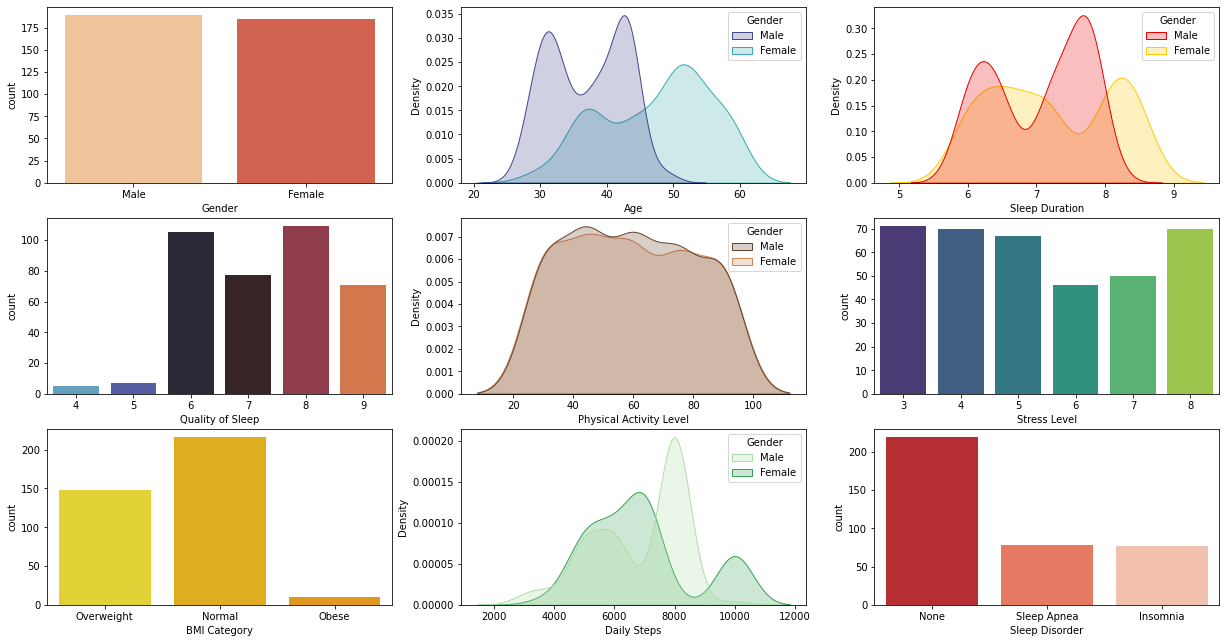

In [18]:
fig, ax = plt.subplots(nrows= 3, ncols= 3, figsize = (21,11))

sns.countplot(data = df, x = 'Gender', ax = ax[0,0], palette = 'OrRd')
sns.kdeplot(data = df, x = 'Age', hue = 'Gender', fill = True, palette = 'mako' , ax = ax[0,1])
sns.kdeplot(data= df, x = 'Sleep Duration', hue = 'Gender', fill = True, palette = 'hot' ,  ax = ax[0,2])
sns.countplot(data = df, x = 'Quality of Sleep', ax = ax[1,0], palette = 'icefire')
sns.kdeplot(data = df, x = 'Physical Activity Level', hue = 'Gender', fill = True, ax = ax[1,1], palette = 'copper')
sns.countplot(data = df, x = 'Stress Level', ax = ax[1,2], palette = 'viridis')
sns.countplot(data = df, x = 'BMI Category', ax = ax[2,0], palette = 'Wistia')
sns.kdeplot(data = df, x = 'Daily Steps', hue = 'Gender', fill = True, ax = ax[2,1], palette = 'Greens')
sns.countplot(data = df, x = 'Sleep Disorder', ax = ax[2,2], palette = 'Reds_r')

plt.show()

### Observation

- Here, we can notice that, the "Count" for "Male" and "Female" is almost equal.
- The "Age" for both the gender category lies almost between 30-55 years. 
- The "Sleep Duration" for the people is greater than 5 hours, which is sufficient amount of sleep for a person.
- With the high level of "Phyisicl acticity" people are getting "Good Quality of Sleep".
- Moreover, most of the people have normal "BMI" which directly relates with the distribution of sleep disorder which shows    equal number of people with and without sleep disorder.


#### Relation between "Physical Activity" and "Quality of Sleep"

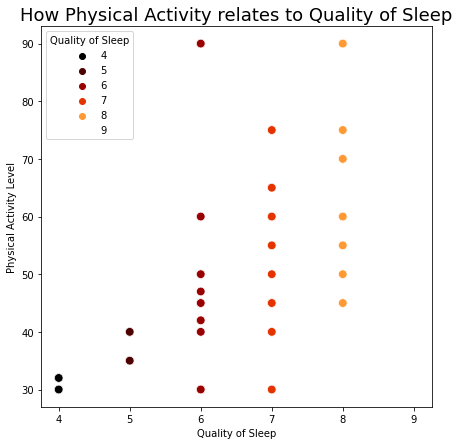

In [19]:
plt.figure(figsize= (7,7))
sns.scatterplot(data = df, x='Quality of Sleep', y='Physical Activity Level', hue='Quality of Sleep', palette='gist_heat',s=75)
plt.title("How Physical Activity relates to Quality of Sleep", fontdict= {'fontsize': 18})
plt.show()

#### Observation

The above scatter plot shows us the relation between people's physical activity and there quality of sleep.
We can observe, "higher" the "Physical Acticity Level", "better" the "Quality of Sleep". Hence with higher physical activity, people are getting good quality of sleep.

#### Relation between "BMI Level" and "Sleep Disorder"

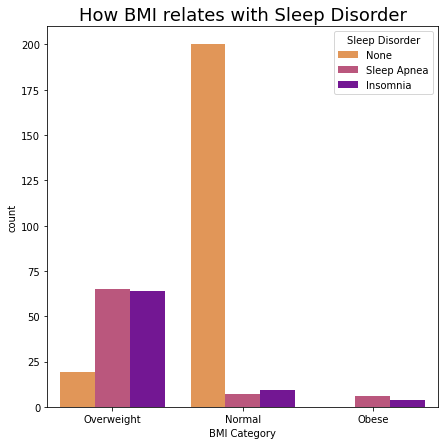

In [20]:
plt.figure(figsize= (7,7))
sns.countplot(data = df, x= 'BMI Category', hue = 'Sleep Disorder', palette= 'plasma_r')
plt.title("How BMI relates with Sleep Disorder", fontdict= {'fontsize': 18})
display()
plt.show()

#### Observation

Here we can notice that, People with "Normal BMI" level are less likely to suffer from any "Sleeping disorder".
The people with "high weight" (overwight people) have more problems with sleeping. Also, for the people with "Obese" BMI level, the sleep disorder range is between minimum to medium.

#### Relation between "Gender" and "Sleep Disorder"

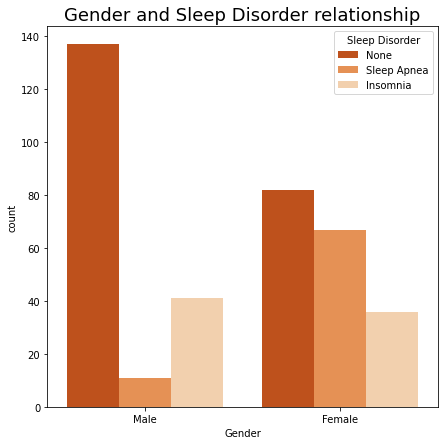

In [21]:
plt.figure(figsize= (7,7))
sns.countplot(data = df, x = 'Gender', hue = 'Sleep Disorder', palette = "Oranges_r")
plt.title("Gender and Sleep Disorder relationship", fontdict= {'fontsize': 18})
plt.show()

#### Observation

From the above plot, we can notice, most of the people have good sleeping condition and are not suffering from any "Sleeping Disorder". However "Females" compared to "Male", are suffering more from different sleeping problems. 
Here, the number of females suffering from "Sleep Apnea" is quite high as compared to males. But the male people have more issue with "Sleep Insomnia" than the female people.

#### Effect of "Stree level" on "Sleep Disorder"

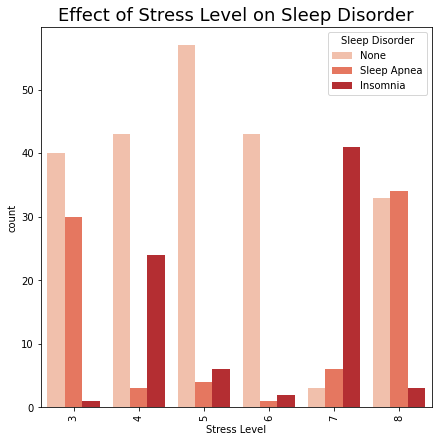

In [22]:
plt.figure(figsize = (7,7))
sns.countplot(data = df, x= "Stress Level", hue = "Sleep Disorder", palette = 'Reds')
plt.title("Effect of Stress Level on Sleep Disorder", fontdict= {'fontsize': 18})
plt.xticks(rotation = 90)
plt.show()

#### Observation

In the above plot, we can note that, the "Stress Level" of a person affects the "Sleeping Disorder" he have. 
People with high stress level are suffering from "Sleep Apnea" and " Insomnia" conditions. Also we can observe that, people with lower stress level are also experiencing "Sleep Apnea".
The peoples with moderate stress level are "happy and sleeping better".

#### Effect of "Occupation" on "Sleep Disorder"

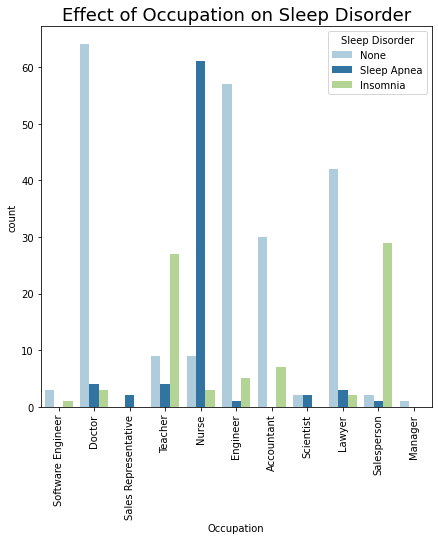

In [23]:
plt.figure(figsize = (7,7))
sns.countplot(data = df, x= "Occupation", hue = "Sleep Disorder", palette = 'Paired')
plt.title("Effect of Occupation on Sleep Disorder", fontdict= {'fontsize': 18})
plt.xticks(rotation = 90)
plt.show()

#### Observation

From the above plot we can state that the "Occupation" of a person has huge impact on his "Sleep Disorder" condition.
Nurses are more subjected to have "Sleep Apenea" condition as compared to other occupations in the list and very few of them have no sleep disorder.
After the nurses, the most affected categories are Salespersons and Teachers, which are highly subjected to "Insomnia" problem. All the other categories of occupations such as Engineers, Doctors, Accountants, Lawyer, Manager, Software Engineers
have medium to no "sleeping problems".

### Data-preprocessing -  Applying Label Encoding on Categorical columns

In [24]:
# Applying label encoder on "Gender", "Occupation", "BMI Category" and, "Sleep Disorder"

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
LE = LabelEncoder()

In [27]:
# Applying label encoder on multiple columns.

df[['Gender','Occupation','BMI Category','Sleep Disorder']]=df[['Gender','Occupation','BMI Category','Sleep Disorder']].apply(LE.fit_transform)

In [28]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic Bp,Diastolic Bp
0,1,27,9,6.1,6,42,6,2,77,4200,1,126,83
1,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
2,1,28,1,6.2,6,60,8,0,75,10000,1,125,80
3,1,28,6,5.9,4,30,8,1,85,3000,2,140,90
4,1,28,6,5.9,4,30,8,1,85,3000,2,140,90


###### Please note that,

- **Gender** - 0: 'Female' , 1: 'Male'
- **Occupation** - 0: 'Accountant', 1: 'Doctor', 2: 'Engineer', 3: 'Lawyer', 4: 'Manager', 5: 'Nurse', 6: 'Sales Representative', 7: 'Salesperson', 8: 'Scientist', 9: 'Software Engineer', 10: 'Teacher'
- **BMI Category** - 0: 'Normal', 1: 'Obese', 2: 'Overweight'
- **Sleep Disorder** - 0:'Insomnia', 1: 'Sleep Apnea', 2: 'None'

### Correlation between the datapoints

In [29]:
df.corr()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
Gender,1.000000,-0.596358,-0.219113,-0.121579,-0.291366,0.001454,0.396018,-0.339945,0.217105,-0.014509,-0.253415
Age,-0.596358,1.000000,0.231188,0.344709,0.473734,0.178993,-0.422344,0.523881,-0.225606,0.057973,0.232000
Occupation,-0.219113,0.231188,1.000000,-0.325775,-0.278071,-0.103660,0.021123,0.694390,0.043928,-0.105877,-0.169800
Sleep Duration,-0.121579,0.344709,-0.325775,1.000000,0.883213,0.212360,-0.811023,-0.377637,-0.516455,-0.039533,0.177552
Quality of Sleep,-0.291366,0.473734,-0.278071,0.883213,1.000000,0.192896,-0.898752,-0.303876,-0.659865,0.016791,0.179592
Physical Activity Level,0.001454,0.178993,-0.103660,0.212360,0.192896,1.000000,-0.034134,0.075508,0.136971,0.772723,0.433214
Stress Level,0.396018,-0.422344,0.021123,-0.811023,-0.898752,-0.034134,1.000000,0.163665,0.670026,0.186829,-0.036058
BMI Category,-0.339945,0.523881,0.694390,-0.377637,-0.303876,0.075508,0.163665,1.000000,0.248550,0.015949,0.013629
Heart Rate,0.217105,-0.225606,0.043928,-0.516455,-0.659865,0.136971,0.670026,0.248550,1.000000,-0.030309,0.205987
Daily Steps,-0.014509,0.057973,-0.105877,-0.039533,0.016791,0.772723,0.186829,0.015949,-0.030309,1.000000,0.342098


###### Plotting the correlation matrix - Heatmap

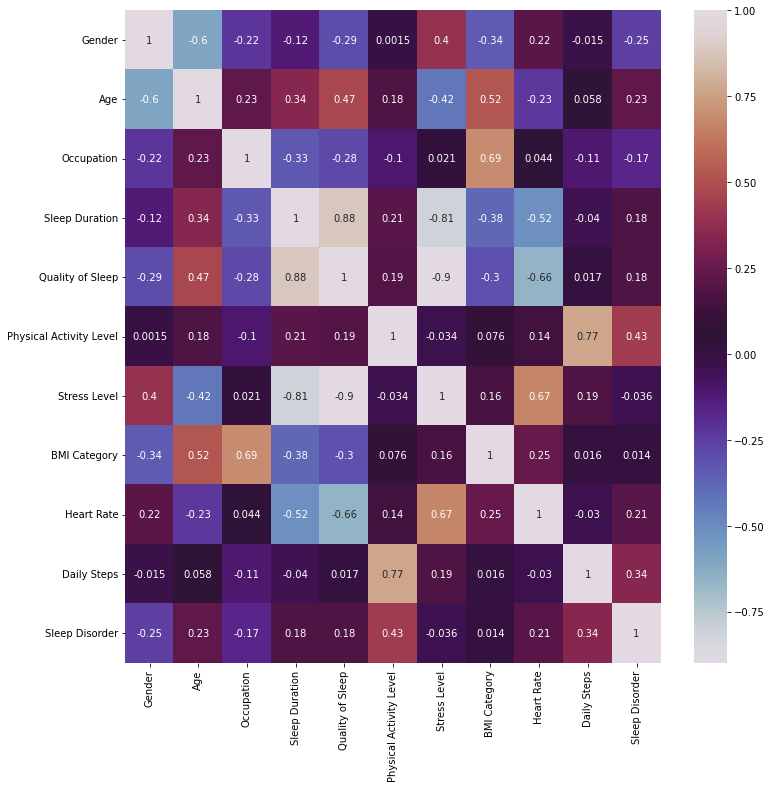

In [30]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True, cmap = 'twilight')
display
plt.show()

## Sleep Disorder Prediction Model


### Spliting Input and Output features

Selecting "Sleep Disorder" as our Output label and all the other columns (features) as our Input datapoints.

In [31]:
X = df.drop(columns= 'Sleep Disorder', axis=1)
Y = df['Sleep Disorder']

### Train-Test Split

In [32]:
# Import Library

from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [34]:
X.shape, X_train.shape, X_test.shape

((374, 12), (299, 12), (75, 12))

### Apply Model

For the classification of Sleeping Disorder problem, we will apply below classifiers:
- Decision Tree Classifier
- Random Forest Classifier

## Decision Tree Classifier

In [35]:
# Importing Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

In [36]:
DTC = DecisionTreeClassifier()

In [37]:
# Fit model to training data
DTC.fit(X_train, Y_train)

DecisionTreeClassifier()

In [38]:
# Predict the data

Y_pred = DTC.predict(X_test)

In [39]:
Y_pred[:5]

array([1, 1, 1, 1, 1])

In [40]:
Y_test[:5]

134    1
323    1
336    1
55     1
314    1
Name: Sleep Disorder, dtype: int32

In [41]:
# Dataframe to compare the predicted data by model and the actual data 
#(Sleep Disorder - 0:'Insomnia', 1: 'Sleep Apnea', 2: 'None')

df_compare = pd.DataFrame({'Actual Data (Y_test)': Y_test,
                           'Predicted Data (Y_pred)': Y_pred})
df_compare[:25]

,Actual Data (Y_test),Predicted Data (Y_pred)
134,1,1
323,1,1
336,1,1
55,1,1
314,1,1
101,1,1
227,0,0
123,1,1
15,1,1
40,1,1


### Model Evaluation

In [42]:
# Accuracy score of a model (for test data)

from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(Y_test, Y_pred)

0.88

##### Plotting Confusion Matrix for accuracy of the model using Heatmap (Decision Tree Classifier)

Let’s check the accuracy of the model using the confusion matrix and print the classification report of our machine learning model:

In [44]:
from sklearn.metrics import confusion_matrix

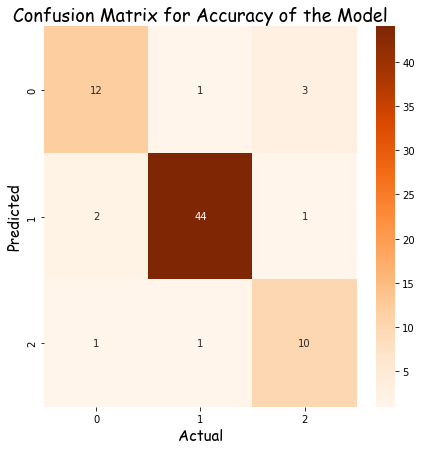

In [45]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(Y_test, Y_pred), annot= True, cmap = 'Oranges')

plt.title("Confusion Matrix for Accuracy of the Model", fontdict= {'family':'fantasy','size':18})
plt.xlabel("Actual", fontdict = {'family': 'fantasy','size':15})
plt.ylabel("Predicted", fontdict = {'family': 'fantasy','size':15})

plt.show()

The diagonal boxes shows the count of "True Positive" values, i.e. the correct predictions made by the model. And the off-diagonal boxes shows the count of false positive values, i.e. the incorrect predictions made by the model.

### Plotting the Actal and Predicted Values using Distribution Plot

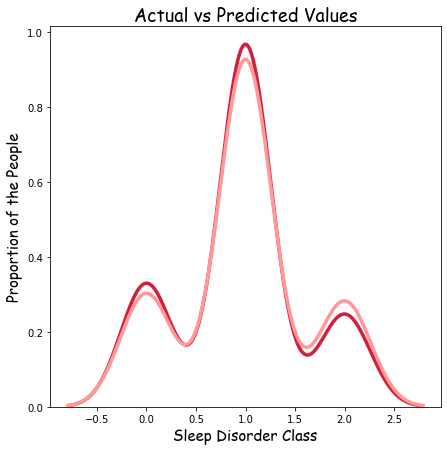

In [46]:
plt.figure(figsize=(7,7))
sns.distplot(Y_test, hist=False,color='#D21F3C',kde_kws=dict(linewidth=3.5), label= 'Actual Value') #dark pink 
sns.distplot(Y_pred, hist=False,color='#ff9999',kde_kws=dict(linewidth=3.5), label= 'Predicted Value') #lightpink 

plt.title('Actual vs Predicted Values',  fontdict= {'family':'fantasy','size':18})
plt.xlabel('Sleep Disorder Class', fontdict = {'family': 'fantasy','size':15})
plt.ylabel('Proportion of the People', fontdict = {'family': 'fantasy','size':15})

plt.show()

The "Actual Values" are represented with "Purple" color and the "Predicted Values" are represented with "Green" color. 

In the plot above, the model's prediction is able to follow the curve of the actual values but some of the predicted values are still different from the actual ones.

### Observation

The Decision Tree Classifier model have predicted data for "Sleeping Disorder Problem" with pretty good accuracy of 88%. 

## Random Forest Classifier

In [47]:
# Importing the class

from sklearn.ensemble import RandomForestClassifier

In [48]:
RFC = RandomForestClassifier()

In [49]:
# Fitting model on training data
RFC.fit(X_train, Y_train)

RandomForestClassifier()

In [50]:
# Predict test data

Y_RFC_pred = RFC.predict(X_test)

In [51]:
Y_RFC_pred[:7]

array([1, 1, 1, 1, 1, 1, 0])

In [52]:
Y_test[:7]

134    1
323    1
336    1
55     1
314    1
101    1
227    0
Name: Sleep Disorder, dtype: int32

In [53]:
# Dataframe to compare the predicted data by model and the actual data 
#(Sleep Disorder - 0:'Insomnia', 1: 'Sleep Apnea', 2: 'None')

df_compare_RFC = pd.DataFrame({'Actual Data (Y_test)': Y_test,
                           'Predicted Data (Y_pred)': Y_RFC_pred})
df_compare_RFC[:25]

,Actual Data (Y_test),Predicted Data (Y_pred)
134,1,1
323,1,1
336,1,1
55,1,1
314,1,1
101,1,1
227,0,0
123,1,1
15,1,1
40,1,1


### Model Evaluation

In [54]:
# Accuracy score of a model (for test data)

from sklearn.metrics import accuracy_score

In [55]:
accuracy_score(Y_test, Y_RFC_pred).round(2)

0.91

##### Plotting Confusion Matrix for accuracy of the model using Heatmap (Random Forest Classifier)

Let’s check the accuracy of the model using the confusion matrix and print the classification report of our machine learning model:

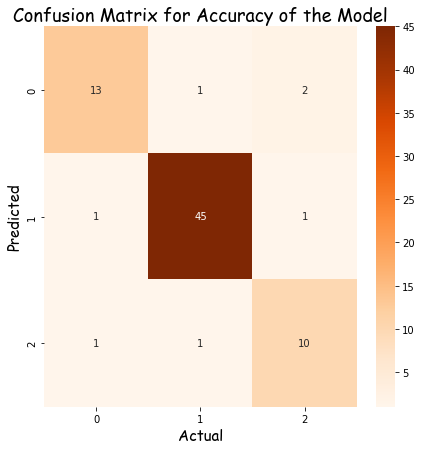

In [56]:
plt.figure(figsize=(7,7))

sns.heatmap(confusion_matrix(Y_test, Y_RFC_pred), annot= True, cmap = 'Oranges')

plt.title("Confusion Matrix for Accuracy of the Model", fontdict= {'family':'fantasy','size':18})
plt.xlabel("Actual", fontdict = {'family': 'fantasy','size':15})
plt.ylabel("Predicted", fontdict = {'family': 'fantasy','size':15})

plt.show()

The diagonal boxes shows the count of "True Positive" values, i.e. the correct predictions made by the model. And the off-diagonal boxes shows the count of false positive values, i.e. the incorrect predictions made by the model. #e5e500

### Plotting the Actual and Predicted Values using Distribution Plot

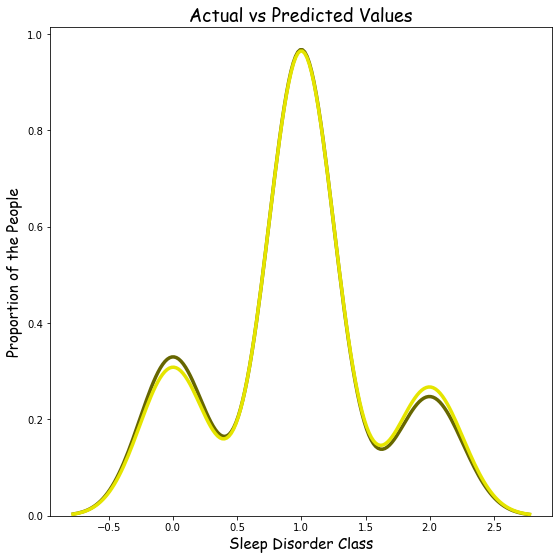

In [57]:
plt.figure(figsize=(9,9))
sns.distplot(Y_test, hist=False,color='#666600',kde_kws=dict(linewidth=3.5), label= 'Actual Value') #brown
sns.distplot(Y_RFC_pred, hist=False,color='#e5e500',kde_kws=dict(linewidth=3.5), label= 'Predicted Value') #yellow

plt.title('Actual vs Predicted Values',  fontdict= {'family':'fantasy','size':18})
plt.xlabel('Sleep Disorder Class', fontdict = {'family': 'fantasy','size':15})
plt.ylabel('Proportion of the People', fontdict = {'family': 'fantasy','size':15})

plt.show()

The "Actual Values" are represented with "Blue" color and the "Predicted Values" are represented with "Pink" color. 

In the plot above, the model's prediction is able to follow the curve of the actual values but some of the predicted values are still different from the actual ones.

### Observation

The Random Forest Classifier model have predicted data for "Sleeping Disorder Problem" with "accuracy of 91%", which is better than Decision Tree Classifier. 